In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions

In [3]:
cd ..

/home/savannahgramze/research/lactea-filament/lactea-filament


In [4]:
from jwst_plots import JWSTCatalog

In [5]:
basepath = '/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [6]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [7]:
cat_fn = f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits'
basetable = Table.read(cat_fn)

In [14]:
reg_filament = Regions.read(f'./regions_/filament_long.region')
reg_filhole = Regions.read(f'./regions_/filhole.region')
reg_cloudd = Regions.read(f'./regions_/cloudd.region')
reg_cloudc1 = Regions.read(f'./regions_/cloudc1.region')
reg_cloudc2 = Regions.read(f'./regions_/cloudc2.region')
#reg_filament_long = Regions.read(f'{basepath}/regions_/filament_long.region')

: 

In [9]:
base_jwstcatalog = JWSTCatalog(basetable)
mask_qf = base_jwstcatalog.get_qf_mask(0.4)
cat_use = JWSTCatalog(basetable[mask_qf])

In [10]:
cat_filament = JWSTCatalog(cat_use.table_region_mask(reg_filament, wcs=ww))
cat_cloudd =   JWSTCatalog(cat_use.table_region_mask(reg_cloudd, wcs=ww))
cat_cloudc1 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc1, wcs=ww))
cat_cloudc2 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc2, wcs=ww))

In [11]:
mask_outside = ~cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_cloudd, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc1, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc2, wcs=ww)
cat_outside = JWSTCatalog(cat_use.catalog[mask_outside])

In [12]:
mask_filament = cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_filhole, wcs=ww)
cat_only_filament = JWSTCatalog(cat_use.catalog[mask_filament])

# Color-Magnitude Diagrams

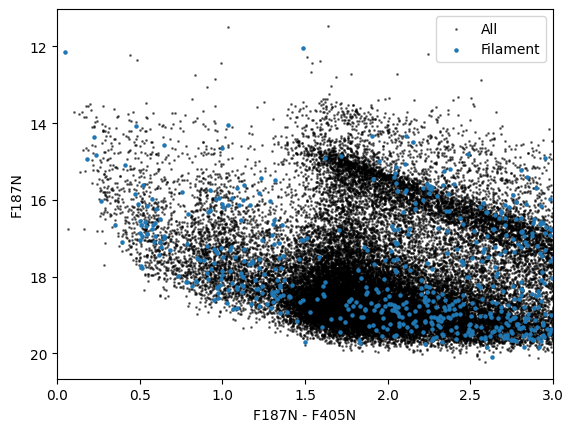

In [13]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

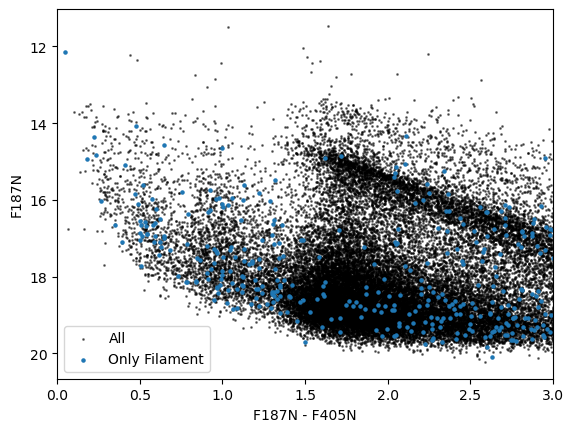

In [13]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
cat_only_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Only Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

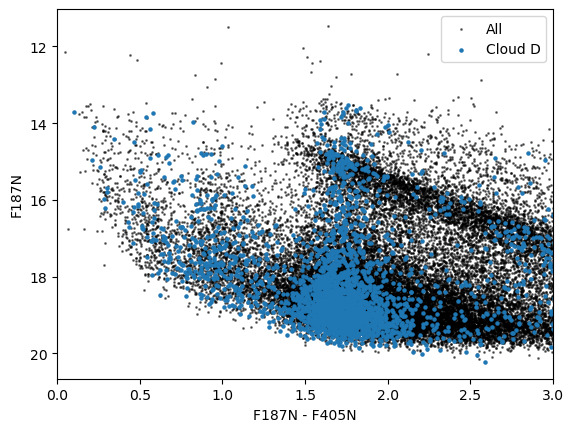

In [14]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

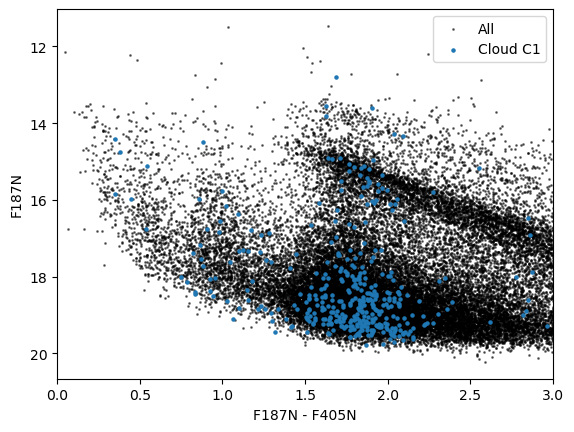

In [15]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

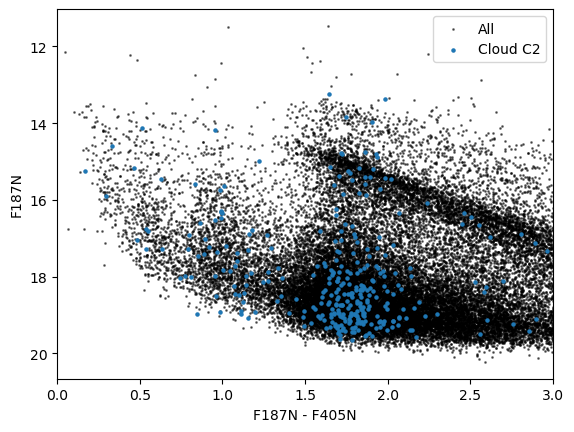

In [16]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

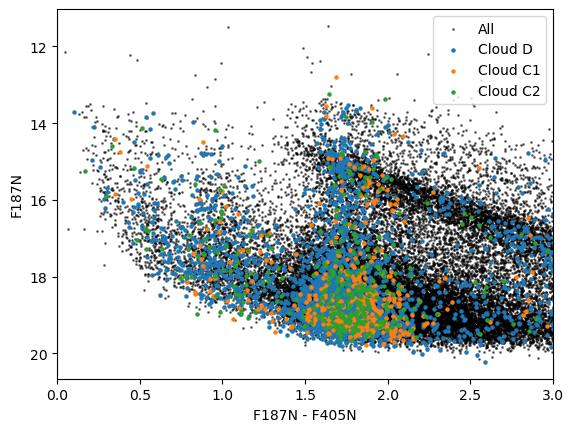

In [17]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

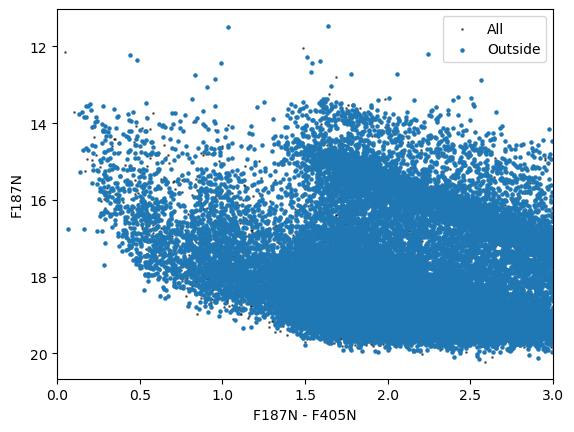

In [18]:
ax = plt.subplot(111)

alpha = 0.5
s = 1

cat_use.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=alpha, s=s, label='All', color='black')
#cat_filament.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Filament')
#cat_cloudd.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud D')
#cat_cloudc1.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C1')
#cat_cloudc2.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Cloud C2')
cat_outside.plot_CMD('F187N', 'F405N', 'F187N', ax=ax, alpha=1, s=5, label='Outside')

ax.legend()
ax.set_xlim(0, 3)
plt.gca().invert_yaxis()

# Magnitude-Magnitude Diagrams

<Axes: xlabel='F405N', ylabel='F410M'>

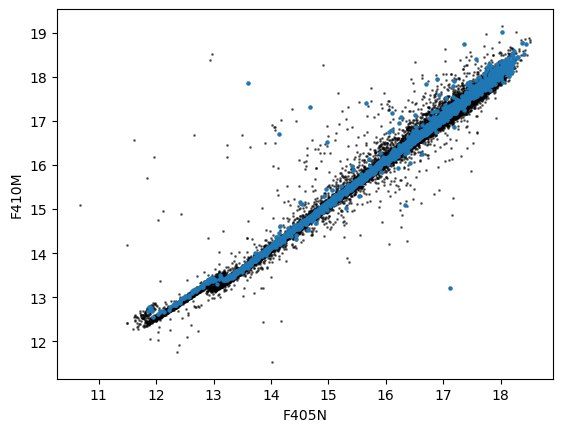

In [19]:
ax = plt.subplot(111)
alpha = 0.5
s = 1
cat_use.plot_MMD('F405N', 'F410M', alpha=alpha, s=s, label='All', color='black', ax=ax)
cat_filament.plot_MMD('F405N', 'F410M', alpha=1, s=5, label='Filament', ax=ax)
#cat_cloudd.plot_MMD('F405N', 'F410M', alpha=1, s=5, label='Cloud D', ax=ax)
#cat_cloudc1.plot_MMD('F405N', 'F410M', alpha=1, s=5, label='Cloud C1', ax=ax)
#cat_cloudc2.plot_MMD('F405N', 'F410M', alpha=1, s=5, label='Cloud C2', ax=ax)

<Axes: xlabel='F187N', ylabel='F182M'>

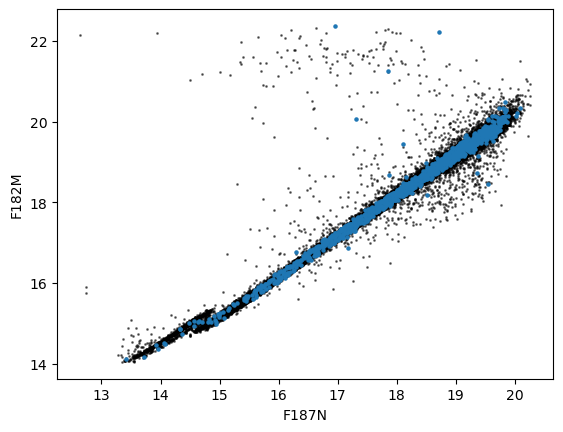

In [20]:
ax = plt.subplot(111)
alpha = 0.5
s = 1
cat_use.plot_MMD('F187N', 'F182M', alpha=alpha, s=s, label='All', color='black', ax=ax)
cat_filament.plot_MMD('F187N', 'F182M', alpha=1, s=5, label='Filament', ax=ax)

In [12]:
ratio_bra = cat_only_filament.catalog['mag_ab_f405n'] / cat_only_filament.catalog['mag_ab_f410m']
mask_bra = np.logical_and(ratio_bra < 0.95, cat_only_filament.catalog['mag_ab_f410m'] > 13.5)

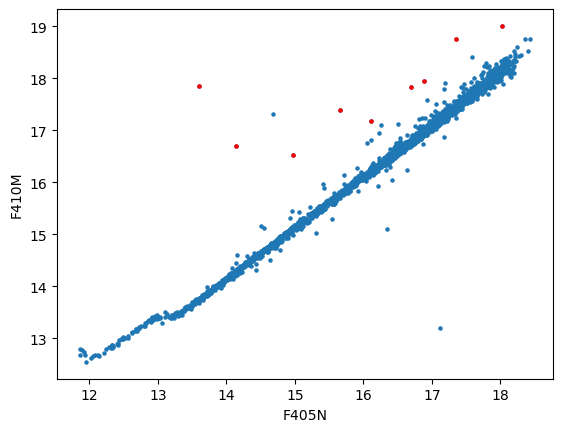

In [22]:
ax=plt.subplot(111)
cat_filament.plot_MMD('F405N', 'F410M', alpha=1, s=5, label='Filament', ax=ax)
ax.scatter(cat_only_filament.catalog['mag_ab_f405n'][mask_bra], cat_only_filament.catalog['mag_ab_f410m'][mask_bra], s=5, color='red', label='Bralpha')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [13]:
ratio_paa = cat_only_filament.catalog['mag_ab_f187n'] / cat_only_filament.catalog['mag_ab_f182m']
mask_paa = np.logical_and(ratio_paa < 0.95, cat_only_filament.catalog['mag_ab_f182m'] > 15)
mask_paa = np.logical_or(mask_paa, np.isnan(np.array(cat_only_filament.catalog['mag_ab_f187n'])))

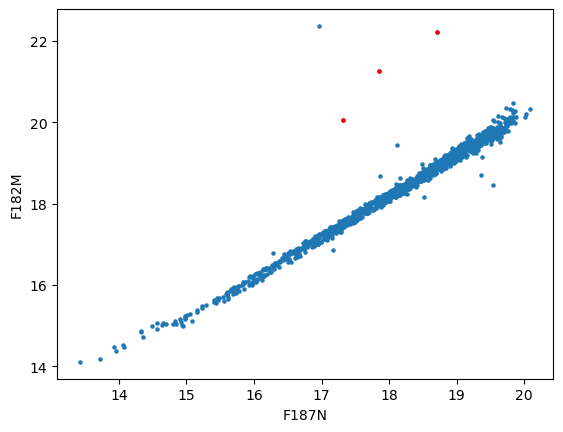

In [24]:
ax=plt.subplot(111)
cat_filament.plot_MMD('F187N', 'F182M', alpha=1, s=5, label='Filament', ax=ax)
ax.scatter(cat_only_filament.catalog['mag_ab_f187n'][mask_paa], cat_only_filament.catalog['mag_ab_f182m'][mask_paa], s=5, color='red', label='Paalpha')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()